## Detecting Sarcasm
- [Data Source](https://www.kaggle.com/datasets/rmisra/news-headlines-dataset-for-sarcasm-detection)

In [1]:
data_path = 'sarcasm_dataset/Sarcasm_Headlines_Dataset.json'

In [2]:
# lets try to read the first line and check the format and structure of the data

with open(data_path, 'r') as f:
    text = f.readline()
    print(text)

{"article_link": "https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5", "headline": "former versace store clerk sues over secret 'black code' for minority shoppers", "is_sarcastic": 0}



- So, each line contains three items
- article_link : URl for the article
- headline: headline for the article and
- is_sarcastic : an integer value (1 or 0) indicating if the article is sarcastic or not

In [3]:
## creating a list to store these texts

text_list = []

with open(data_path, 'r') as file:
    for line in file:
        text_list.append(line.rstrip())

In [4]:
# print the first 3 lines

text_list[:3]

['{"article_link": "https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5", "headline": "former versace store clerk sues over secret \'black code\' for minority shoppers", "is_sarcastic": 0}',
 '{"article_link": "https://www.huffingtonpost.com/entry/roseanne-revival-review_us_5ab3a497e4b054d118e04365", "headline": "the \'roseanne\' revival catches up to our thorny political mood, for better and worse", "is_sarcastic": 0}',
 '{"article_link": "https://local.theonion.com/mom-starting-to-fear-son-s-web-series-closest-thing-she-1819576697", "headline": "mom starting to fear son\'s web series closest thing she will have to grandchild", "is_sarcastic": 1}']

# Accessing individual item elements

In [5]:
import json

In [6]:
sample_text  = json.loads(text_list[0])

In [7]:
sample_text

{'article_link': 'https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5',
 'headline': "former versace store clerk sues over secret 'black code' for minority shoppers",
 'is_sarcastic': 0}

In [19]:
# accessing the article link
sample_text['article_link']

'https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5'

### Store the article components

In [8]:
## parsing through the text_list and add the components into respective list

labels = [] # to store is is_sarcastic or not
urls = []  # to store article_link
sentences = []  # to store headlines

# parse through each line and store the components

for line in text_list:
    text = json.loads(line)
    sentences.append(text['headline'])
    labels.append(text['is_sarcastic'])
    urls.append(text['article_link'])

In [9]:
# check the values
print(urls[:3])
print(sentences[:3])
print(labels[:3])

['https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5', 'https://www.huffingtonpost.com/entry/roseanne-revival-review_us_5ab3a497e4b054d118e04365', 'https://local.theonion.com/mom-starting-to-fear-son-s-web-series-closest-thing-she-1819576697']
["former versace store clerk sues over secret 'black code' for minority shoppers", "the 'roseanne' revival catches up to our thorny political mood, for better and worse", "mom starting to fear son's web series closest thing she will have to grandchild"]
[0, 0, 1]


In [11]:
# check the length of all the articles

len(sentences)

26709

## Create Tokens using these headlines

In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

In [93]:
## set up the parameter values

vocabs_size = 2000
oov_token = '<OOV>'
embedding_dim = 16
trunc_type ='post'
padding_type ='post'
max_len = 80
training_size = 20000 # will use 20000 for training and the rest for validation

In [94]:
## set up the training and validation data

train_sentences = sentences[:training_size]
validation_sentences = sentences[training_size:]

train_labels = labels[:training_size]
test_labels = labels[training_size:]

# convert the labels into numpy array
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

In [95]:
# set up the tokenizer and pad sequences

# instantiate the tokenizer
tokenizer = Tokenizer(num_words=vocabs_size, lower=True, oov_token='<OOV>')

# fit on the sentence
tokenizer.fit_on_texts(train_sentences)

# get word_index
word_index = tokenizer.word_index

# get sequences
train_sequences = tokenizer.texts_to_sequences(train_sentences)
validation_sequences = tokenizer.texts_to_sequences(validation_sentences)

# get padded 
train_padded = pad_sequences(train_sequences, maxlen=max_len, padding=padding_type, truncating=trunc_type)
test_padded = pad_sequences(validation_sequences, maxlen=max_len, padding=padding_type, truncating=trunc_type)

## Create the Model

In [56]:
import tensorflow as tf

In [96]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Embedding(vocabs_size, embedding_dim, input_length=max_len),
    tf.keras.layers.GlobalAveragePooling1D(),
    
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

# compile
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [97]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 80, 16)            32000     
                                                                 
 global_average_pooling1d_10  (None, 16)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_20 (Dense)            (None, 8)                 136       
                                                                 
 dense_21 (Dense)            (None, 1)                 9         
                                                                 
Total params: 32,145
Trainable params: 32,145
Non-trainable params: 0
_________________________________________________________________


In [98]:
# fit the model
num_epochs = 15

model.fit(train_padded,
          train_labels,
          epochs=num_epochs,
          validation_data=(test_padded, test_labels)
         )

Epoch 1/15
625/625 [==============================] - 2s 2ms/step - loss: 0.6674 - accuracy: 0.5887 - val_loss: 0.6103 - val_accuracy: 0.7008
Epoch 2/15
625/625 [==============================] - 1s 2ms/step - loss: 0.5049 - accuracy: 0.7911 - val_loss: 0.4430 - val_accuracy: 0.8086
Epoch 3/15
625/625 [==============================] - 1s 2ms/step - loss: 0.3926 - accuracy: 0.8328 - val_loss: 0.3948 - val_accuracy: 0.8250
Epoch 4/15
625/625 [==============================] - 1s 2ms/step - loss: 0.3567 - accuracy: 0.8443 - val_loss: 0.3818 - val_accuracy: 0.8265
Epoch 5/15
625/625 [==============================] - 1s 2ms/step - loss: 0.3361 - accuracy: 0.8537 - val_loss: 0.3715 - val_accuracy: 0.8338
Epoch 6/15
625/625 [==============================] - 1s 2ms/step - loss: 0.3231 - accuracy: 0.8599 - val_loss: 0.3692 - val_accuracy: 0.8305
Epoch 7/15
625/625 [==============================] - 1s 2ms/step - loss: 0.3135 - accuracy: 0.8649 - val_loss: 0.3713 - val_accuracy: 0.8344
Epoch 

## Model evaluation

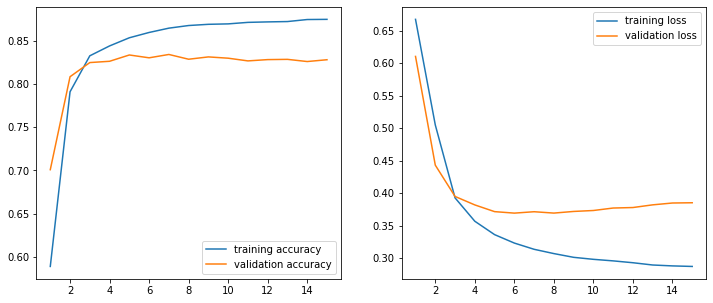

In [99]:
import pandas as pd
# plot
import matplotlib.pyplot as plt

metrics = pd.DataFrame(model.history.history)

epochs_range = range(1, num_epochs + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
plt.plot(epochs_range, metrics['accuracy'], label = 'training accuracy')
plt.plot(epochs_range, metrics['val_accuracy'], label = 'validation accuracy')
plt.legend(loc='best')

plt.subplot(1,2,2)
plt.plot(epochs_range, metrics['loss'], label = 'training loss')
plt.plot(epochs_range, metrics['val_loss'], label = 'validation loss')
plt.legend(loc='best')

### Visualize Word Embeddings

After training, we can visualize the trained weights in the `Embedding` layer to see words that are clustered together. The [Tensorflow Embedding Projector](https://projector.tensorflow.org/) is able to reduce the 16-dimension vectors we defined earlier into fewer components so it can be plotted in the projector. First, we will need to get these weights.

In [100]:
# get the embedding layer from the model

embedding_layer = model.layers[0]

# now get the weights of this layer
embedding_weights = embedding_layer.get_weights()[0]

print(type(embedding_weights))

<class 'numpy.ndarray'>


In [101]:
embedding_weights[0]

array([ 0.0534263 ,  0.03714428, -0.24847117, -0.03261249, -0.04658416,
        0.03341867,  0.02795085,  0.00153025,  0.02048072, -0.2071168 ,
       -0.5769428 , -0.17954025, -0.03059975, -0.11868373, -0.5717815 ,
        0.033468  ], dtype=float32)

Now we will need to generate two files:

* `vecs.tsv` - contains the vector weights of each word in the vocabulary
* `meta.tsv` - contains the words in the vocabularym

In [102]:
# first lets get the index_word so that we can parse through

index_word = tokenizer.index_word

In [104]:
# lets write the vocab words and its associated weights vector into two different files
import io

# open the writeable files for vector weights and vocabs 
out_v = io.open('vecs_tsv.tsv', 'w',encoding='utf-8')
out_m = io.open('meta_tsv.tsv', 'w', encoding='utf-8')

# Initialize the loop. Start counting at `1` because `0` is just for the padding
for word_num in range(1, vocabs_size):

  # Get the word associated at the current index
  word_name = index_word[word_num]

  # Get the embedding weights associated with the current index
  word_embedding = embedding_weights[word_num]

  # Write the word name
  out_m.write(word_name + "\n")

  # Write the word embedding
  out_v.write('\t'.join([str(x) for x in word_embedding]) + "\n")

# Close the files
out_v.close()
out_m.close()

<img src="Projector_sarcasm.jpg" width=1000 height=1200 />

In [111]:
import tensorflow as tf

# Initialize a GlobalAveragePooling1D (GAP1D) layer
gap1d_layer = tf.keras.layers.GlobalAveragePooling1D()

# Define sample array
sample_array = np.array([[[10,2],[1,3],[1,1]]])

# Print shape and contents of sample array
print(f'shape of sample_array = {sample_array.shape}')
print(f'sample array: {sample_array}')

# Pass the sample array to the GAP1D layer
output = gap1d_layer(sample_array)

# Print shape and contents of the GAP1D output array
print(f'output shape of gap1d_layer: {output.shape}')
print(f'output array of gap1d_layer: {output.numpy()}')

shape of sample_array = (1, 3, 2)
sample array: [[[10  2]
  [ 1  3]
  [ 1  1]]]
output shape of gap1d_layer: (1, 2)
output array of gap1d_layer: [[4 2]]


The architecture is similar to the previous lab but you will use a GlobalAveragePooling1D layer instead of Flatten after the Embedding. This adds the task of averaging over the sequence dimension before connecting to the dense layers. See a short demo of how this works using the snippet below. Notice that it gets the average over 3 arrays (i.e. (10 + 1 + 1) / 3 and (2 + 3 + 1) / 3 to arrive at the final output.